In [0]:
import numpy as np
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [0]:
learn_rate = 0.005 # learning rate on backward propagation
batch_size = 100 # batch size 
epoch = 25


In [0]:
(x_train, y_train),(x_test,y_test) = mnist.load_data() # load MNIST dataset into training and test sets.

In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]* x_train.shape[2]) # data reshape before normalization
y_train = keras.utils.to_categorical(y_train, 10) #convert to categorical data instead of numerical data

In [0]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]) # data reshape before normalization
temp = y_test #saving original y values for final check
y_test = keras.utils.to_categorical(y_test,10) #convert to categorical data instead of numerical data

In [0]:
x_train = x_train.astype('float32') # Define as float32 type
x_test = x_test.astype('float32') # Define as float32 type
x_train = x_train / 255 # normalization
x_test = x_test / 255 # normalization

In [0]:
# logistic regression function step 1
def forward_prop(w,b,x):
  op = np.dot(w,np.transpose(x)) + b  
  return sigmoid(op)

In [0]:
# logistic regression function step 2
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [0]:
# mean squared error loss function
def loss_func(y_train,op,batch_size):
  return np.sum(np.multiply((np.transpose(y_train) - op), (np.transpose(y_train) - op))/2, axis = 1, keepdims = True)/batch_size

In [0]:
# Backward Progation based on set learning rate to calculate better weights and bias values
def backward_prop(x_train, y_train, op, w, b, learn_rate):
  d_loss = - (np.transpose(y_train) - op)
  d_sig = sigmoid(op) * (1 - sigmoid(op))
  d_z = np.multiply(d_loss, d_sig)
  d_w = np.dot(d_z, x_train)
  d_b = np.sum(d_z, axis = 1, keepdims = True)
  w = w - learn_rate * d_w
  b = b - learn_rate * d_b
  return w,b

In [28]:
# initialization of random weights and bias values.
np.random.seed(1) # same seed for random functions used so keep the the pseudo random numbers similar. 
w = np.random.randn(10,784)*0.01
b = np.random.randn(10,1)*0.01
arr = []
for k in range(epoch):
  for i in range(0, x_train.shape[0], batch_size):
    op = forward_prop(w, b, x_train[i : i + batch_size]) # Training model with logistic regression
    w,b = backward_prop(x_train[i : i + batch_size], y_train[i : i + batch_size], op, w, b, learn_rate) 
  output = forward_prop(w, b, x_test) 
  output = np.transpose(output)
  output_list = list()
  for j in range(10000):
    output_list.append(np.argmax(output[j]))
  counter = 0
  for m in range(10000):
    if output_list[m] == temp[m]:
      counter += 1
  print('epoch: ', k+1)
  print(counter, '/10000')
  print('accuracy: ', counter*0.01)
  arr.append(counter*0.01)

epoch:  1
8955 /10000
accuracy:  89.55
epoch:  2
9049 /10000
accuracy:  90.49
epoch:  3
9076 /10000
accuracy:  90.76
epoch:  4
9103 /10000
accuracy:  91.03
epoch:  5
9110 /10000
accuracy:  91.10000000000001
epoch:  6
9125 /10000
accuracy:  91.25
epoch:  7
9127 /10000
accuracy:  91.27
epoch:  8
9141 /10000
accuracy:  91.41
epoch:  9
9143 /10000
accuracy:  91.43
epoch:  10
9151 /10000
accuracy:  91.51
epoch:  11
9151 /10000
accuracy:  91.51
epoch:  12
9156 /10000
accuracy:  91.56
epoch:  13
9155 /10000
accuracy:  91.55
epoch:  14
9157 /10000
accuracy:  91.57000000000001
epoch:  15
9157 /10000
accuracy:  91.57000000000001
epoch:  16
9159 /10000
accuracy:  91.59
epoch:  17
9156 /10000
accuracy:  91.56
epoch:  18
9152 /10000
accuracy:  91.52
epoch:  19
9158 /10000
accuracy:  91.58
epoch:  20
9161 /10000
accuracy:  91.61
epoch:  21
9160 /10000
accuracy:  91.60000000000001
epoch:  22
9160 /10000
accuracy:  91.60000000000001
epoch:  23
9163 /10000
accuracy:  91.63
epoch:  24
9164 /10000
accura

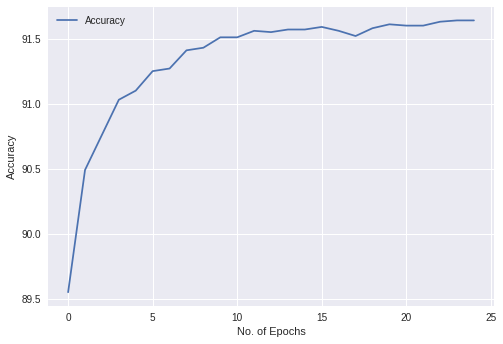

In [29]:
plt.plot(arr, label = 'Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()